In [1]:
# Importing Libraries 
import pandas as pd
import ast
from datasets import load_dataset 
import matplotlib.pyplot as plt
# Loading Data
dataset = load_dataset ( 'lukebarousse/data_jobs')
df = dataset ['train'].to_pandas ()
# Data Cleanup
df['job_posted_date'] = pd.to_datetime (df ['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)
df_da_us = df[(df['job_title_short'] == "Data Analyst") & (df['job_country']== 'United States')].copy()
df_da_us=df_da_us.dropna(subset=['salary_year_avg'])

In [ ]:
df_da_us = df_da_us.explode('job_skills')

In [33]:
df_da_us_group = df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_da_top_pay = df_da_us_group.sort_values(by='median', ascending=False).head(10)
df_da_skills = df_da_us_group.sort_values(by='count', ascending= False).head(10).sort_values(by='median', ascending=False)
df_da_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


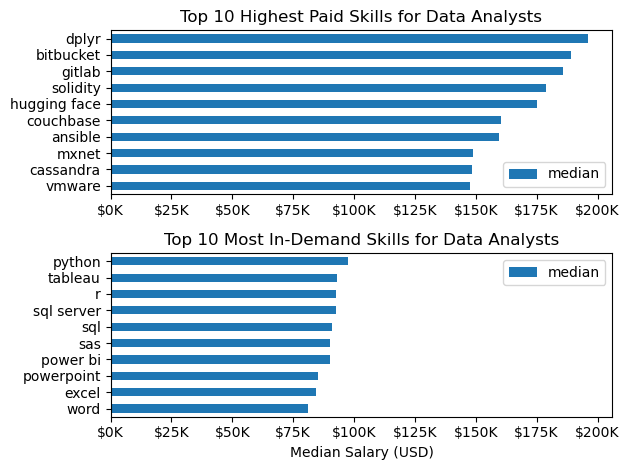

In [36]:
fig, ax = plt.subplots(2, 1)

df_da_top_pay[::-1].plot(kind='barh', y='median', ax =ax[0])
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
df_da_skills[::-1].plot(kind='barh', y='median', ax =ax[1])
ax[1].set_title('Top 10 Most In-Demand Skills for Data Analysts')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.tight_layout()
plt.show()
